# Bank customer churn analysis

### About Bank Churn

**<span style="background-color: yellow">Bank churn</span>** refers to the phenomenon where customers **<span style="background-color: yellow">stop using the services</span>** of a bank. It is a critical issue as it affects the bank’s **<span style="background-color: yellow">revenue and growth</span>**. 

**<span style="background-color: yellow">Common reasons</span>** for churn include **<span style="background-color: yellow">poor customer service</span>**, **<span style="background-color: yellow">high fees</span>**, and **<span style="background-color: yellow">better offers</span>** from competitors. Banks use **<span style="background-color: yellow">churn analysis</span>** to identify at-risk customers and implement **<span style="background-color: yellow">retention strategies</span>**. Reducing churn is essential for maintaining a stable **<span style="background-color: yellow">customer base</span>**.


In this analysis, we will explore various factors influencing **<span style="background-color: yellow">bank churn</span>**. This includes examining customer demographics, **<span style="background-color: yellow">account activities</span>**, and **<span style="background-color: yellow">service usage patterns</span>**. By understanding these factors, we aim to identify key drivers of churn and develop effective **<span style="background-color: yellow">retention strategies</span>**.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data frame
df=pd.read_csv("Bank-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape    #Finding the shape of the data frame

(10000, 18)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
# Getting the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.describe(include=np.number)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [7]:
# Create a mask for surnames with counts greater than 20
surname_counts = df['Surname'].value_counts()
mask = df['Surname'].isin(surname_counts[surname_counts > 20].index)

# Apply the mask to filter the DataFrame
filtered_df = df[mask]

In [8]:
filtered_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,0,2,GOLD,318
25,26,15738191,Maclean,577,France,Male,25,3,0.00,2,0,1,124508.29,0,0,3,PLATINUM,659
46,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1,1,3,DIAMOND,779
99,100,15633059,Fanucci,413,France,Male,34,9,0.00,2,0,0,6534.18,0,0,1,PLATINUM,449


In [9]:
filtered_df.shape

(553, 18)

In [10]:
filtered_df['Surname'].nunique()

23

And the overall length of the data is 10,000, with respective to that the filtered_df has length 553. So, `with respective to 10k the filtered length is neglected`.

In [11]:
len(df)

10000

There is `no impact of Surname, RowNumber on the overall data`. Therefore we are removing the `columns Surname, RowNumber.`

In [12]:
df['CustomerId'].value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

There are all **unique no. of CustomerId** in the data. There we are dropping it to reduce the complexcity.

In [13]:
# Dropping the columns 'RowNumber','Surname', 'CustomerId' as there is no impact of the cols in the data.
df.drop(columns=['RowNumber','Surname', 'CustomerId'], inplace = True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [15]:
df.shape

(10000, 15)

In [16]:
# Finding the null values

df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

- So, there is **'no null values'** in the **Data.**

#### Finding the null values in the scence of percentages.

In [17]:
# Total number of rows
total_rows = df.shape[0]

# Calculate percentage of null values for each column
null_percentages = df.isnull().sum() / total_rows * 100

print("\nPercentage of null values for all columns:")
print(null_percentages)


Percentage of null values for all columns:
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64


In [18]:
# Checking and Removing Duplicates

duplicated = df[df.duplicated()]

In [19]:
duplicated

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


In [20]:
duplicated.shape

(0, 15)

- Here, there are **`no duplicated values`**.

In [21]:
# finding the data types of the data

df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### Performing the `label encoding in country column` in the data to `reduce the memory` of the data.

In [23]:
# Changing the 'object type' of Geography column into "integer" type.

def geography(Geography):
    if Geography == "France":
        return 1
    elif Geography == "Germany":
        return 2
    elif Geography == "Spain":
        return 3
    else:
        return "No-Geography"

In [24]:
df['Geography']=df['Geography'].apply(geography)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,1,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,3,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,1,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,1,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,3,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### Performing the label encoding in Gender column in the data to reduce the memory of the data.

In [25]:
# Changing the 'object type' of Gender column into "integer" type.

def gender(Gender):
    if Gender == 'Male':
        return 1
    else:
        return 0

In [26]:
df['Gender']=df['Gender'].apply(gender)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [27]:
# Now checking the data type of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int64  
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.1+

Now, we have successfully converted all the columns into **'Numerical columns'**.

- And the **memory usage is 1.2+ MB.**
- The **Memory usage is very less, `but still we can reduce the usage of the memory`.**

### Optimizing Memory Usage of the Dataframe

#### Updating the data type of `Geography column.`

In [28]:
# Ensuring that the 'Geography' column is of int type (if not already)
df['Geography'] = df['Geography'].astype(int)

# Checking that the max value in 'Geography' column
print('Max value entry in Geography column (before conversion): ', df['Geography'].max())

# Memory usage before conversion
print('Memory usage of Geography column (before conversion): ', df['Geography'].memory_usage())

# Convert 'Geography' column to a categorical type
df['Geography'] = df['Geography'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['Geography'] = df['Geography'].cat.as_ordered()

# Now check the max value in 'Geography' column
print('Max value entry in Geography column (after conversion to ordered): ', df['Geography'].max())

# Memory usage after conversion
print('Memory usage of Geography column (after conversion): ', df['Geography'].memory_usage())

Max value entry in Geography column (before conversion):  3
Memory usage of Geography column (before conversion):  40128
Max value entry in Geography column (after conversion to ordered):  3
Memory usage of Geography column (after conversion):  10260


#### Updating the data type of `Gender column.`

In [29]:
# Ensuring the 'Gender' column is of int type (if not already)
df['Gender'] = df['Gender'].astype(int)

# Checking the max value in 'Gender' column
print('Max value entry in Gender column (before conversion): ', df['Gender'].max())

# Memory usage before conversion
print('Memory usage of Gender column (before conversion): ', df['Gender'].memory_usage())

# Convert 'Gender' column to a categorical type
df['Gender'] = df['Gender'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['Gender'] = df['Gender'].cat.as_ordered()

# Now check the max value in 'Gender' column
print('Max value entry in Gender column (after conversion to ordered): ', df['Gender'].max())

# Memory usage after conversion
print('Memory usage of Gender column (after conversion): ', df['Gender'].memory_usage())

Max value entry in Gender column (before conversion):  1
Memory usage of Gender column (before conversion):  40128
Max value entry in Gender column (after conversion to ordered):  1
Memory usage of Gender column (after conversion):  10252


#### Updating the data type of `Tenure column.`

In [30]:
# Ensuring the 'Tenure' column is of int type (if not already)
df['Tenure'] = df['Tenure'].astype(int)

# Checking the max value in 'Tenure' column
print('Max value entry in Tenure column (before conversion): ', df['Tenure'].max())

# Memory usage before conversion
print('Memory usage of Tenure column (before conversion): ', df['Tenure'].memory_usage())

# Convert 'Tenure' column to a categorical type
df['Tenure'] = df['Tenure'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['Tenure'] = df['Tenure'].cat.as_ordered()

# Now check the max value in 'Tenure' column
print('Max value entry in Tenure column (after conversion to ordered): ', df['Tenure'].max())

# Memory usage after conversion
print('Memory usage of Tenure column (after conversion): ', df['Tenure'].memory_usage())

Max value entry in Tenure column (before conversion):  10
Memory usage of Tenure column (before conversion):  40128
Max value entry in Tenure column (after conversion to ordered):  10
Memory usage of Tenure column (after conversion):  10516


#### Updating the data type of `NumOfProducts column.`

In [31]:
# Ensure the 'NumOfProducts' column is of int type (if not already)
df['NumOfProducts'] = df['NumOfProducts'].astype(int)

# Check the max value in 'NumOfProducts' column
print('Max value entry in NumOfProducts column (before conversion): ', df['NumOfProducts'].max())

# Memory usage before conversion
print('Memory usage of NumOfProducts column (before conversion): ', df['NumOfProducts'].memory_usage())

# Convert 'NumOfProducts' column to a categorical type
df['NumOfProducts'] = df['NumOfProducts'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['NumOfProducts'] = df['NumOfProducts'].cat.as_ordered()

# Now check the max value in 'NumOfProducts' column
print('Max value entry in NumOfProducts column (after conversion to ordered): ', df['NumOfProducts'].max())

# Memory usage after conversion
print('Memory usage of NumOfProducts column (after conversion): ', df['NumOfProducts'].memory_usage())

Max value entry in NumOfProducts column (before conversion):  4
Memory usage of NumOfProducts column (before conversion):  40128
Max value entry in NumOfProducts column (after conversion to ordered):  4
Memory usage of NumOfProducts column (after conversion):  10332


#### Updating the data type of `HasCrCard column.`

In [32]:
# Ensure the 'HasCrCard' column is of int type (if not already)
df['HasCrCard'] = df['HasCrCard'].astype(int)

# Check the max value in 'HasCrCard' column
print('Max value entry in HasCrCard column (before conversion): ', df['HasCrCard'].max())

# Memory usage before conversion
print('Memory usage of HasCrCard column (before conversion): ', df['HasCrCard'].memory_usage())

# Convert 'HasCrCard' column to a categorical type
df['HasCrCard'] = df['HasCrCard'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['HasCrCard'] = df['HasCrCard'].cat.as_ordered()

# Now check the max value in 'HasCrCard' column
print('Max value entry in HasCrCard column (after conversion to ordered): ', df['HasCrCard'].max())

# Memory usage after conversion
print('Memory usage of HasCrCard column (after conversion): ', df['HasCrCard'].memory_usage())

Max value entry in HasCrCard column (before conversion):  1
Memory usage of HasCrCard column (before conversion):  40128
Max value entry in HasCrCard column (after conversion to ordered):  1
Memory usage of HasCrCard column (after conversion):  10252


#### Updating the data type of `IsActiveMember column.`

In [33]:
# Ensure the 'IsActiveMember' column is of int type (if not already)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)

# Check the max value in 'IsActiveMember' column
print('Max value entry in IsActiveMember column (before conversion): ', df['IsActiveMember'].max())

# Memory usage before conversion
print('Memory usage of IsActiveMember column (before conversion): ', df['IsActiveMember'].memory_usage())

# Convert 'IsActiveMember' column to a categorical type
df['IsActiveMember'] = df['IsActiveMember'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['IsActiveMember'] = df['IsActiveMember'].cat.as_ordered()

# Now check the max value in 'IsActiveMember' column
print('Max value entry in IsActiveMember column (after conversion to ordered): ', df['IsActiveMember'].max())

# Memory usage after conversion
print('Memory usage of IsActiveMember column (after conversion): ', df['IsActiveMember'].memory_usage())

Max value entry in IsActiveMember column (before conversion):  1
Memory usage of IsActiveMember column (before conversion):  40128
Max value entry in IsActiveMember column (after conversion to ordered):  1
Memory usage of IsActiveMember column (after conversion):  10252


#### Updating the data type of `Exited column.`

In [34]:
# Ensure the 'Exited' column is of int type (if not already)
df['Exited'] = df['Exited'].astype(int)

# Check the max value in 'Exited' column
print('Max value entry in Exited column (before conversion): ', df['Exited'].max())

# Memory usage before conversion
print('Memory usage of Exited column (before conversion): ', df['Exited'].memory_usage())

# Convert 'Exited' column to a categorical type
df['Exited'] = df['Exited'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['Exited'] = df['Exited'].cat.as_ordered()

# Now check the max value in 'Exited' column
print('Max value entry in Exited column (after conversion to ordered): ', df['Exited'].max())

# Memory usage after conversion
print('Memory usage of Exited column (after conversion): ', df['Exited'].memory_usage())

Max value entry in Exited column (before conversion):  1
Memory usage of Exited column (before conversion):  40128
Max value entry in Exited column (after conversion to ordered):  1
Memory usage of Exited column (after conversion):  10252


#### Updating the data type of `Complain column.`

In [35]:
# Ensure the 'Complain' column is of int type (if not already)
df['Complain'] = df['Complain'].astype(int)

# Check the max value in 'Complain' column
print('Max value entry in Complain column (before conversion): ', df['Complain'].max())

# Memory usage before conversion
print('Memory usage of Complain column (before conversion): ', df['Complain'].memory_usage())

# Convert 'Complain' column to a categorical type
df['Complain'] = df['Complain'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['Complain'] = df['Complain'].cat.as_ordered()

# Now check the max value in 'Complain' column
print('Max value entry in Complain column (after conversion to ordered): ', df['Complain'].max())

# Memory usage after conversion
print('Memory usage of Complain column (after conversion): ', df['Complain'].memory_usage())

Max value entry in Complain column (before conversion):  1
Memory usage of Complain column (before conversion):  40128
Max value entry in Complain column (after conversion to ordered):  1
Memory usage of Complain column (after conversion):  10252


#### Updating the data type of `Satisfaction Score column.`

In [36]:
# Ensure the 'Satisfaction Score' column is of int type (if not already)
df['Satisfaction Score'] = df['Satisfaction Score'].astype(int)

# Check the max value in 'Satisfaction Score' column
print('Max value entry in Satisfaction Score column (before conversion): ', df['Satisfaction Score'].max())

# Memory usage before conversion
print('Memory usage of Satisfaction Score column (before conversion): ', df['Satisfaction Score'].memory_usage())

# Convert 'Satisfaction Score' column to a categorical type
df['Satisfaction Score'] = df['Satisfaction Score'].astype('category')

# To get the max value, convert it to an ordered categorical type
df['Satisfaction Score'] = df['Satisfaction Score'].cat.as_ordered()

# Now check the max value in 'Satisfaction Score' column
print('Max value entry in Satisfaction Score column (after conversion to ordered): ', df['Satisfaction Score'].max())

# Memory usage after conversion
print('Memory usage of Satisfaction Score column (after conversion): ', df['Satisfaction Score'].memory_usage())

Max value entry in Satisfaction Score column (before conversion):  5
Memory usage of Satisfaction Score column (before conversion):  40128
Max value entry in Satisfaction Score column (after conversion to ordered):  5
Memory usage of Satisfaction Score column (after conversion):  10340


#### Updating the data type of `Card Type column.`

In [37]:
print('Memory usage of Card Type column : ', df['Card Type'].memory_usage())
# Since the dtype of Card Type column is object, we can convert the dtype to category to save memory
df['Card Type'] = df['Card Type'].astype('category')
print('Updated Memory usage of season column : ',df['Card Type'].memory_usage())

Memory usage of Card Type column :  80128
Updated Memory usage of season column :  10332


#### Updating the data type of `CreditScore column.`

In [38]:
# Check the max value in 'CreditScore' column
print('Max value entry in CreditScore column: ', df['CreditScore'].max())

# Memory usage before conversion
print('Memory usage of CreditScore column (before conversion): ', df['CreditScore'].memory_usage())

# Convert 'CreditScore' column to int8 type
df['CreditScore'] = df['CreditScore'].astype('int16')

# Memory usage after conversion
print('Updated memory usage of CreditScore column (after conversion): ', df['CreditScore'].memory_usage())

Max value entry in CreditScore column:  850
Memory usage of CreditScore column (before conversion):  80128
Updated memory usage of CreditScore column (after conversion):  20128


#### Updating the data type of `Age column.`

In [39]:
# Check the max value in 'Age' column
print('Max value entry in Age column: ', df['Age'].max())

# Memory usage before conversion
print('Memory usage of Age column (before conversion): ', df['Age'].memory_usage())

# Convert 'Age' column to int8 type
df['Age'] = df['Age'].astype('int8')

# Memory usage after conversion
print('Updated memory usage of Age column (after conversion): ', df['Age'].memory_usage())

Max value entry in Age column:  92
Memory usage of Age column (before conversion):  80128
Updated memory usage of Age column (after conversion):  10128


#### Updating the data type of `Point Earned column.`

In [40]:
# Check the max value in 'Point Earned' column
print('Max value entry in Point Earned column: ', df['Point Earned'].max())

# Memory usage before conversion
print('Memory usage of Point Earned column (before conversion): ', df['Point Earned'].memory_usage())

# Convert 'Point Earned' column to int8 type
df['Point Earned'] = df['Point Earned'].astype('int16')

# Memory usage after conversion
print('Updated memory usage of Point Earned column (after conversion): ', df['Point Earned'].memory_usage())

Max value entry in Point Earned column:  1000
Memory usage of Point Earned column (before conversion):  80128
Updated memory usage of Point Earned column (after conversion):  20128


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  int16   
 1   Geography           10000 non-null  category
 2   Gender              10000 non-null  category
 3   Age                 10000 non-null  int8    
 4   Tenure              10000 non-null  category
 5   Balance             10000 non-null  float64 
 6   NumOfProducts       10000 non-null  category
 7   HasCrCard           10000 non-null  category
 8   IsActiveMember      10000 non-null  category
 9   EstimatedSalary     10000 non-null  float64 
 10  Exited              10000 non-null  category
 11  Complain            10000 non-null  category
 12  Satisfaction Score  10000 non-null  category
 13  Card Type           10000 non-null  category
 14  Point Earned        10000 non-null  int16   
dtypes: category(10), float64(2), int16(2)

- Before optimizing, the `memory usage is 1.2+ MB.`

- After optimizing, the `memory usage is 304.6 KB.`

### Differentiating the `categorical and numerical columns`

In [42]:
# Differentiating the num columns

num_cols = df.dtypes !='category'
num_cols = list(num_cols[num_cols].index)
num_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

In [43]:
# Differentiating the cat columns

cat_cols = df.dtypes =='category'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type']

In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Univariate Analysis

UniVariate analysis for cat columns.

In [45]:
df['Geography'].value_counts()/len(df)*100

1    50.14
2    25.09
3    24.77
Name: Geography, dtype: float64

In [46]:
df['Gender'].value_counts()/len(df)*100

1    54.57
0    45.43
Name: Gender, dtype: float64

In [47]:
df['Tenure'].value_counts()/len(df)*100

2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64

In [48]:
df['Card Type'].value_counts()/len(df)*100

DIAMOND     25.07
GOLD        25.02
SILVER      24.96
PLATINUM    24.95
Name: Card Type, dtype: float64

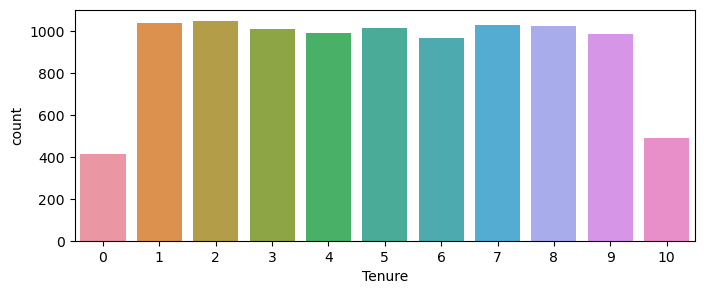

In [49]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x=df['Tenure'])
plt.show()

In [50]:
df['NumOfProducts'].value_counts()/len(df)*100

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

In [51]:
df['Exited'].value_counts()/len(df)*100

0    79.62
1    20.38
Name: Exited, dtype: float64

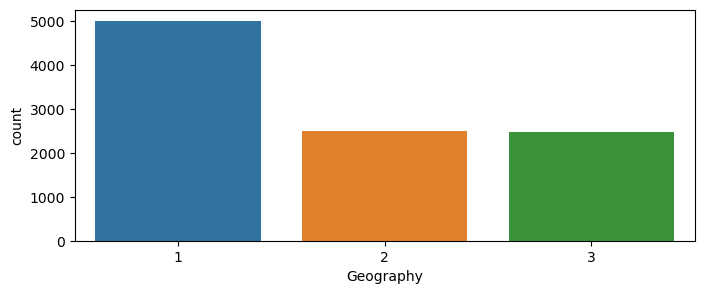

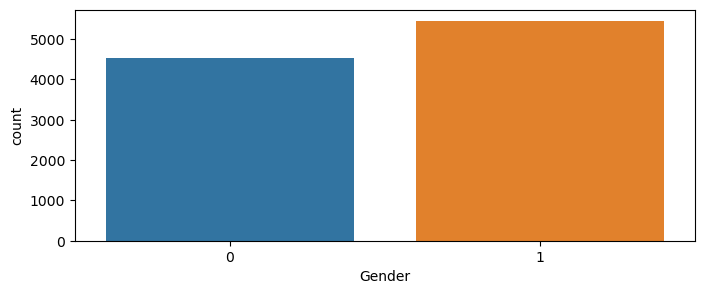

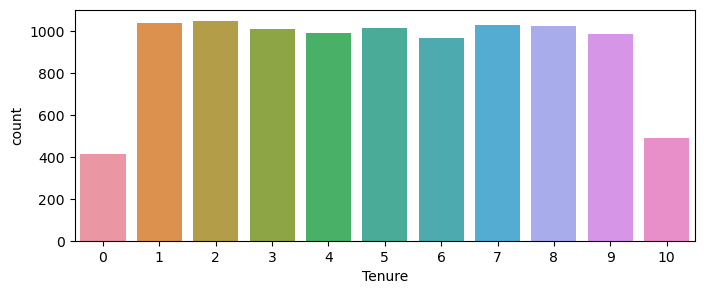

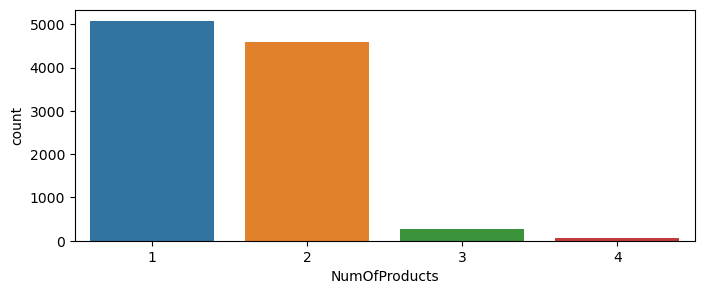

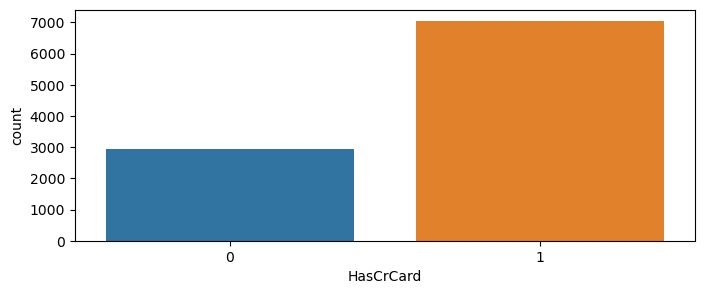

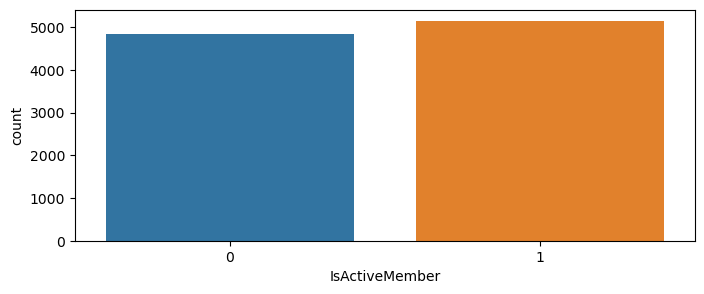

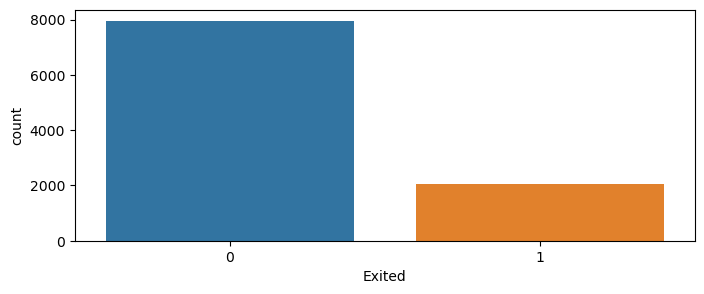

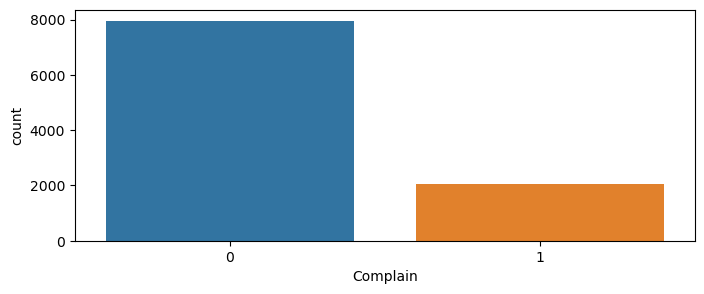

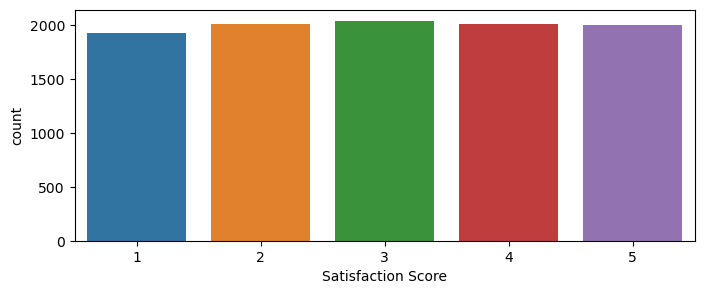

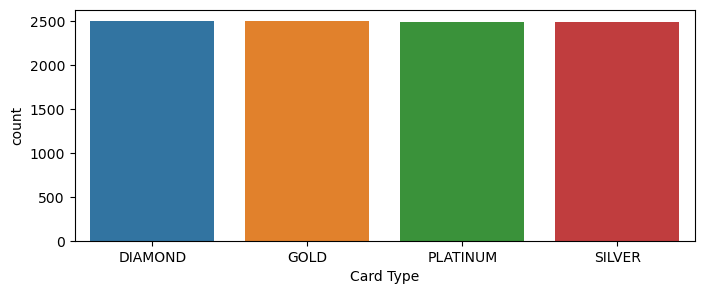

In [52]:
for i in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x=df[i])
    plt.show()

### Insights

- **`Around 50% of customers are from France.`**
- There are more customers in `Male` then `Female`. But, both are almost same in number.
- In most cases, the `Tenure is between 1-9 years`.
- Almost all customers is **`having one or two products`**. People are `less likely to havee more than 2 products`.
- 70% customers are having Credit Card.
- Around 20% people are exited from the bank and 80% remain in the bank. Therefore, the **churn rate is 20%.**

### Finding the distribution of the Numerical columns

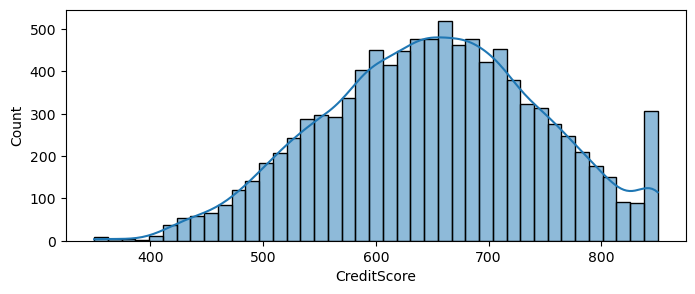

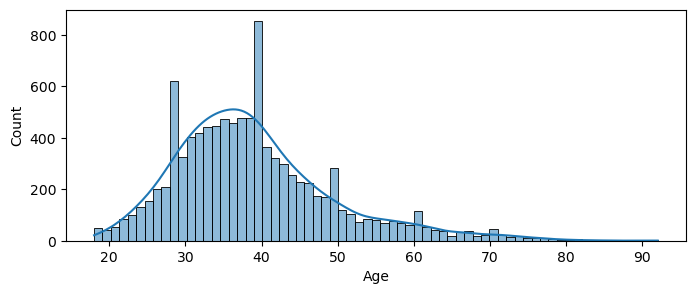

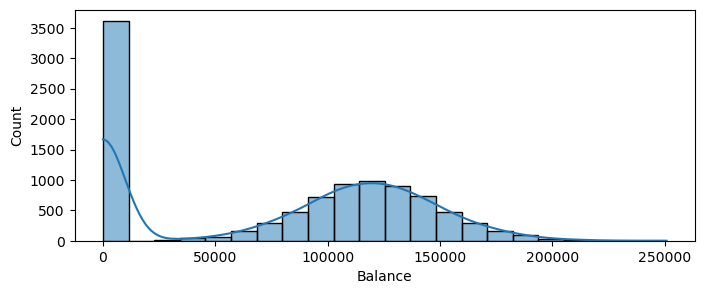

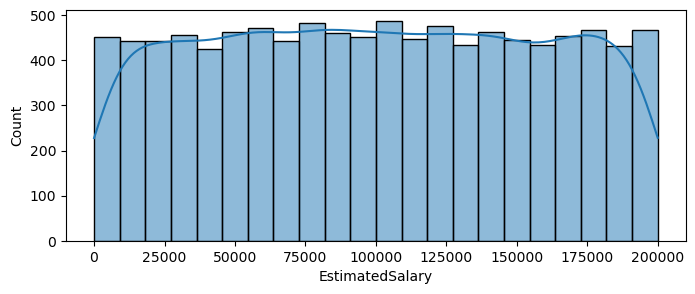

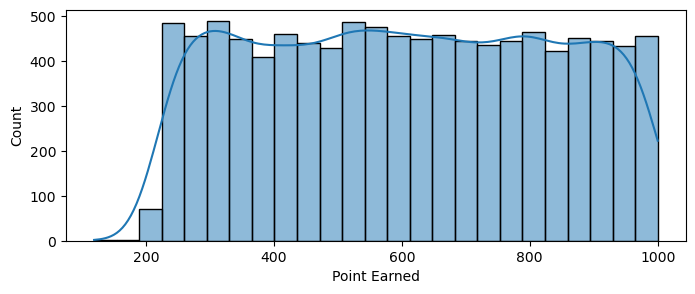

In [53]:
for i in num_cols:
    plt.figure(figsize=(8,3))
    sns.histplot(data=df, x=i, kde=1)
    plt.show()

# Bivariate Analysis

### Target variable vs categorical variables

In [54]:
df_exited = df[df['Exited']==1]

In [55]:
df_nonexited = df[df['Exited']==0]

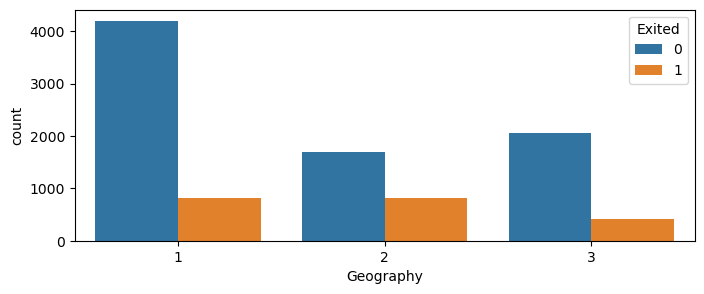

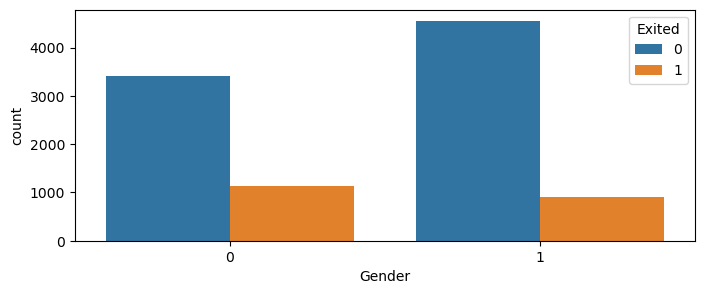

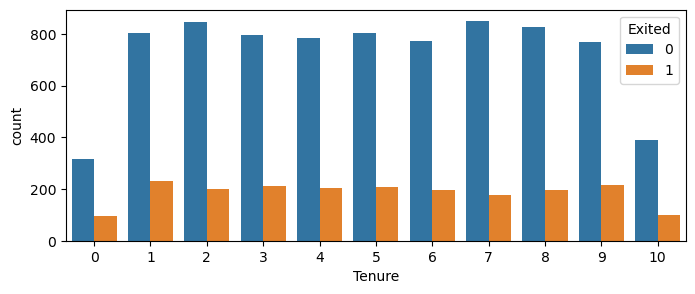

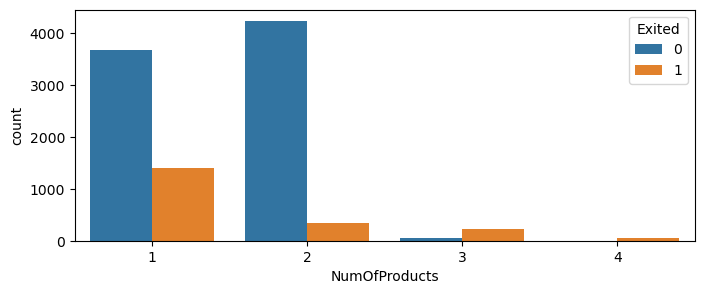

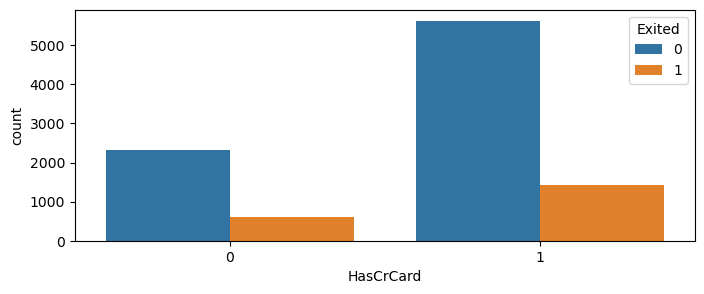

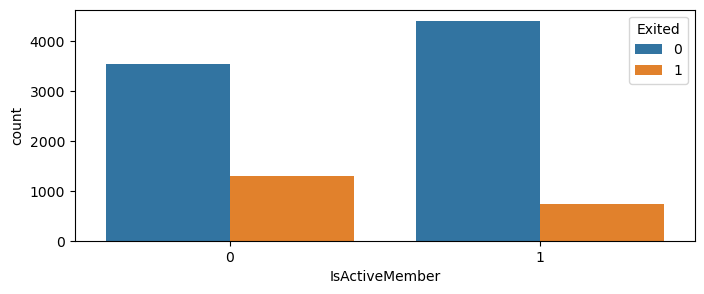

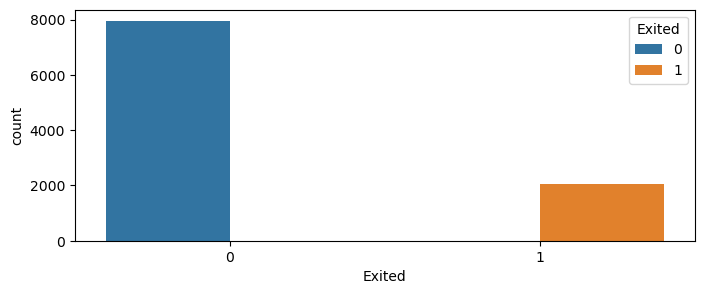

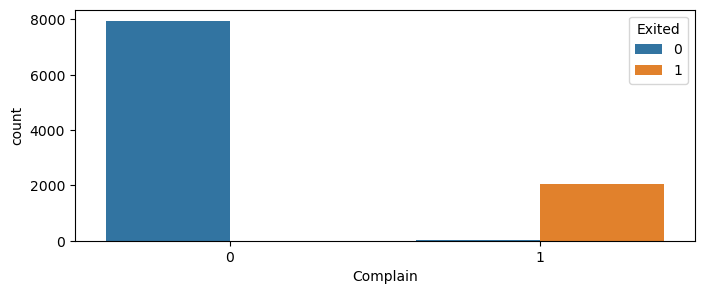

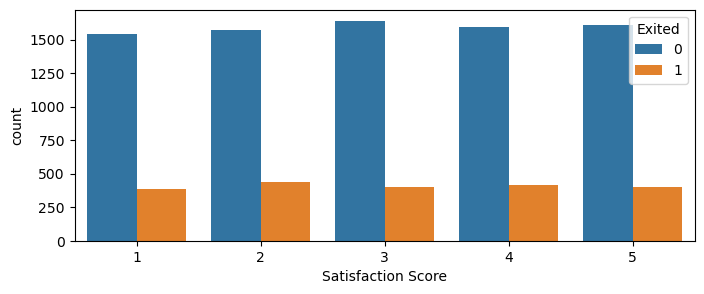

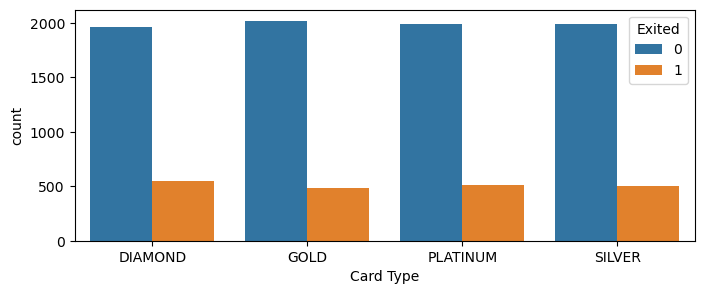

In [56]:
# Count plot of catogerical columns.
for i in cat_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df, x=i, hue= df['Exited'])
    plt.show()    

- Customers having `2 products` are more likely to stay with the banks for the `longer time.`
- Almost all the customers **who raised the complaint are churned from the bank.**
- Customers who are **`inactive`** `is more likely to churn` compared to active customers

### Target variable vs numerical columns

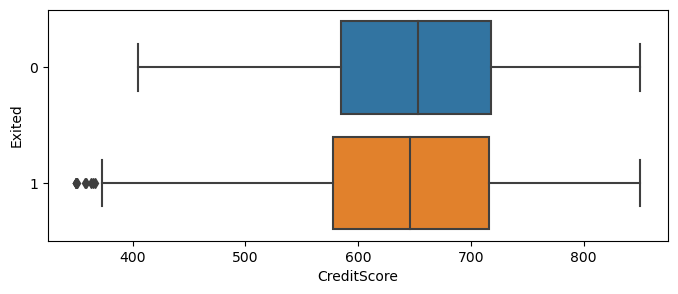

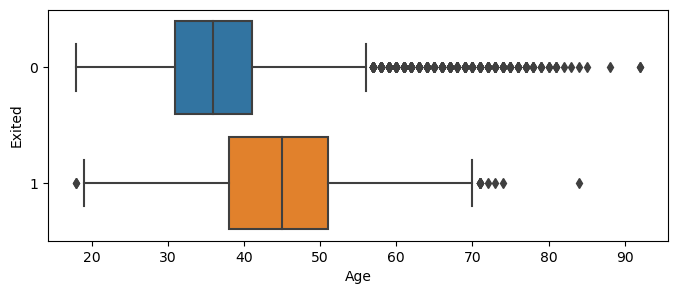

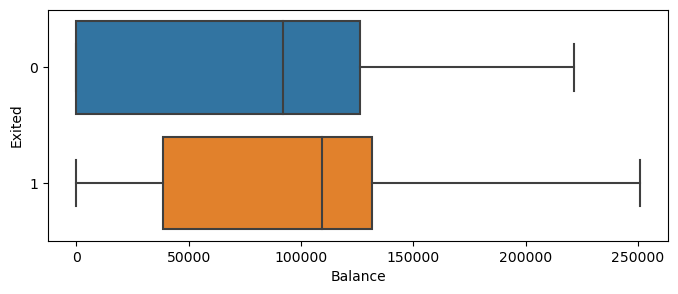

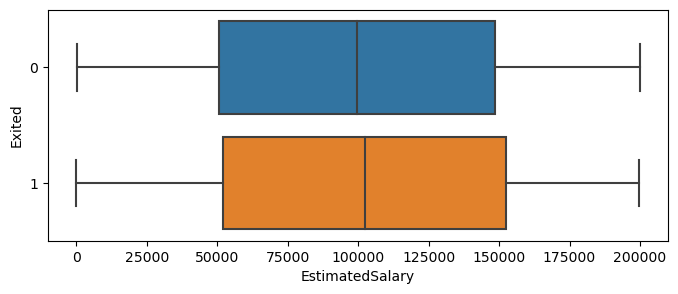

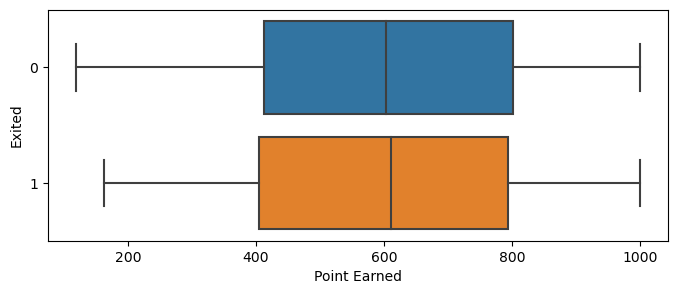

In [57]:
for i in num_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(data=df, x=i, y='Exited')
    plt.show()

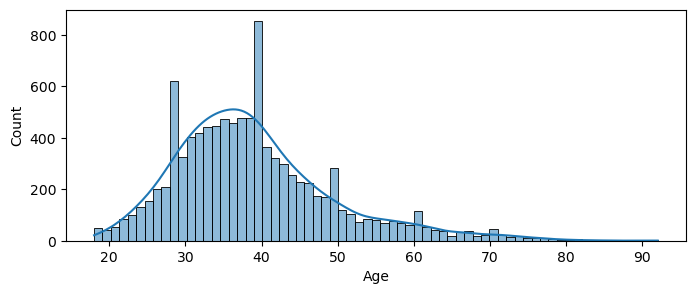

In [58]:
plt.figure(figsize=(8,3))
sns.histplot(data=df_exited, x=df['Age'], kde=1)
plt.show()

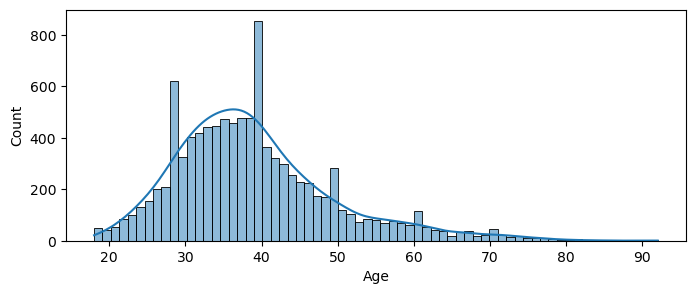

In [59]:
plt.figure(figsize=(8,3))
sns.histplot(data=df_nonexited, x=df['Age'], kde=1)
plt.show()

***Finding the 80% of the Age group***

In [60]:
df_exited['Age'].quantile(0.1),df_exited['Age'].quantile(0.9)

(32.0, 58.0)

- For customers who exited (Exited = 1), the median age is around 50, and the 82% range spans from approximately 32 to 58.

In [61]:
df_nonexited['Age'].quantile(0.1),df_nonexited['Age'].quantile(0.9)

(27.0, 49.0)

- The age distribution of customers who did not exit (Exited = 0) shows a median age slightly below 40. The 80% range spans from around 27 to 49.

In [62]:
num_cols

['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

In [63]:
df_exited['CreditScore'].mean(),df_nonexited['CreditScore'].mean()

(645.4146221786065, 651.8378548103492)

- The credit score of both Exited and nonexited people are almost same

In [64]:
df_exited['Age'].mean(),df_nonexited['Age'].mean()

(44.83562315996075, 37.40806330067822)

In [65]:
df_exited['Balance'].mean(),df_nonexited['Balance'].mean()

(91109.47600588808, 72742.75066314971)

- The mean Age, Balance of churned people is **different** from people who stay with the bank. Need to perform **Hypothesis test**

In [66]:
df_exited['EstimatedSalary'].mean(),df_nonexited['EstimatedSalary'].mean()

(101509.90878312073, 99726.85314117045)

In [67]:
df_exited['Point Earned'].mean(),df_nonexited['Point Earned'].mean()

(604.4484789008832, 607.0440844009042)

- ***Eatimated salary, points earned, Credit Score are almost same*** for Exited and non-Exited customers.

### counts of each value in categorical column

In [68]:
for i in cat_cols:
    a=df_exited[i].value_counts()
    print(i)
    print( a, end="\n")
    print(25*"+")

Geography
2    814
1    811
3    413
Name: Geography, dtype: int64
+++++++++++++++++++++++++
Gender
0    1139
1     899
Name: Gender, dtype: int64
+++++++++++++++++++++++++
Tenure
1     232
9     214
3     213
5     209
4     203
2     201
8     197
6     196
7     177
10    101
0      95
Name: Tenure, dtype: int64
+++++++++++++++++++++++++
NumOfProducts
1    1409
2     349
3     220
4      60
Name: NumOfProducts, dtype: int64
+++++++++++++++++++++++++
HasCrCard
1    1425
0     613
Name: HasCrCard, dtype: int64
+++++++++++++++++++++++++
IsActiveMember
0    1303
1     735
Name: IsActiveMember, dtype: int64
+++++++++++++++++++++++++
Exited
1    2038
0       0
Name: Exited, dtype: int64
+++++++++++++++++++++++++
Complain
1    2034
0       4
Name: Complain, dtype: int64
+++++++++++++++++++++++++
Satisfaction Score
2    439
4    414
3    401
5    397
1    387
Name: Satisfaction Score, dtype: int64
+++++++++++++++++++++++++
Card Type
DIAMOND     546
PLATINUM    508
SILVER      502
GOLD      

In [69]:
# for the values in the percentage

for i in cat_cols:
    a=df_exited[i].value_counts(normalize=1)*100
    print(i)
    print( a, end="\n")
    print(25*"+")

Geography
2    39.941119
1    39.793916
3    20.264966
Name: Geography, dtype: float64
+++++++++++++++++++++++++
Gender
0    55.888126
1    44.111874
Name: Gender, dtype: float64
+++++++++++++++++++++++++
Tenure
1     11.383710
9     10.500491
3     10.451423
5     10.255152
4      9.960746
2      9.862610
8      9.666340
6      9.617272
7      8.684985
10     4.955839
0      4.661433
Name: Tenure, dtype: float64
+++++++++++++++++++++++++
NumOfProducts
1    69.136408
2    17.124632
3    10.794897
4     2.944063
Name: NumOfProducts, dtype: float64
+++++++++++++++++++++++++
HasCrCard
1    69.921492
0    30.078508
Name: HasCrCard, dtype: float64
+++++++++++++++++++++++++
IsActiveMember
0    63.935231
1    36.064769
Name: IsActiveMember, dtype: float64
+++++++++++++++++++++++++
Exited
1    100.0
0      0.0
Name: Exited, dtype: float64
+++++++++++++++++++++++++
Complain
1    99.803729
0     0.196271
Name: Complain, dtype: float64
+++++++++++++++++++++++++
Satisfaction Score
2    21.540726
4

- **`Germany has the highest churn rate`**. And **`France has almost similar to the Germany`** in chuen rate.

## Finding Correlation between variables

In [70]:
# Numerical variables
num_cols=np.array(num_cols)
num_cols

array(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'],
      dtype='<U15')

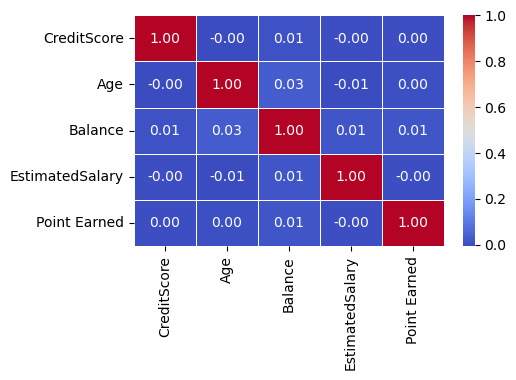

In [71]:
corr=df[num_cols].corr()
# Set up the matplotlib figure
plt.figure(figsize=(5, 3))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.show()

- There are **`no strong correlations between any pairs of numerical variables`**, as indicated by the values being close to zero.
- The lack of significant **`off-diagonal values`** suggests that the numerical variables are **`largely independent of each other`**.

# Hypothesis Testing

### Testing categorical columns.

In [72]:
cat_cols

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type']

Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the Gender & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the Gender & Churn.

In [73]:
from scipy.stats import chi2_contingency

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['HasCrCard'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between Gender and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between Gender and Churn.")

Chi-squared value: 0.4494039375253385
p-value: 0.5026181509009862
Degrees of freedom: 1
Expected frequencies:
[[2344.809 5617.191]
 [ 600.191 1437.809]]
Fail to reject the null hypothesis (Ho). There is no significant difference between Gender and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the IsActiveMember & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the IsActiveMember & Churn.

In [74]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['IsActiveMember'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between IsActiveMember and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between IsActiveMember and Churn.")

Chi-squared value: 243.6948024819593
p-value: 6.1531674381134086e-55
Degrees of freedom: 1
Expected frequencies:
[[3860.7738 4101.2262]
 [ 988.2262 1049.7738]]
Reject the null hypothesis (Ho). There is a significant difference between IsActiveMember and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the IsActiveMember & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the IsActiveMember & Churn.

In [75]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['Tenure'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between Tenure and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between Tenure and Churn.")

Chi-squared value: 14.058258798510963
p-value: 0.17035079254617927
Degrees of freedom: 10
Expected frequencies:
[[328.8306 824.067  834.4176 803.3658 787.4418 805.7544 769.9254 818.4936
  816.105  783.4608 390.138 ]
 [ 84.1694 210.933  213.5824 205.6342 201.5582 206.2456 197.0746 209.5064
  208.895  200.5392  99.862 ]]
Fail to reject the null hypothesis (Ho). There is no significant difference between Tenure and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the Geography & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the Geography & Churn.

In [76]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['Geography'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between Geography and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between Geography and Churn.")

Chi-squared value: 300.6264011211942
p-value: 5.245736109572763e-66
Degrees of freedom: 2
Expected frequencies:
[[3992.1468 1997.6658 1972.1874]
 [1021.8532  511.3342  504.8126]]
Reject the null hypothesis (Ho). There is a significant difference between Geography and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the NumOfProducts & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the NumOfProducts & Churn.

In [77]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['NumOfProducts'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between NumOfProducts and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between NumOfProducts and Churn.")

Chi-squared value: 1501.5048306588592
p-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[4047.8808 3654.558   211.7892   47.772 ]
 [1036.1192  935.442    54.2108   12.228 ]]
Reject the null hypothesis (Ho). There is a significant difference between NumOfProducts and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the NumOfProducts & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the NumOfProducts & Churn.

In [78]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['NumOfProducts'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between Complain and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between Complain and Churn.")

Chi-squared value: 1501.5048306588592
p-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[4047.8808 3654.558   211.7892   47.772 ]
 [1036.1192  935.442    54.2108   12.228 ]]
Reject the null hypothesis (Ho). There is a significant difference between Complain and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the Satisfaction Score & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the Satisfaction Score & Churn.

In [79]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['Satisfaction Score'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between Satisfaction Score and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between Satisfaction Score and Churn.")

Chi-squared value: 3.8027035326309573
p-value: 0.4333649732774312
Degrees of freedom: 4
Expected frequencies:
[[1538.2584 1603.5468 1625.8404 1598.7696 1595.5848]
 [ 393.7416  410.4532  416.1596  409.2304  408.4152]]
Fail to reject the null hypothesis (Ho). There is no significant difference between Satisfaction Score and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the Card Type & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the SCard Type & Churn.

In [80]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['Card Type'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between Card Type and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between Card Type and Churn.")

Chi-squared value: 5.053223027060927
p-value: 0.16794112067810177
Degrees of freedom: 3
Expected frequencies:
[[1996.0734 1992.0924 1986.519  1987.3152]
 [ 510.9266  509.9076  508.481   508.6848]]
Fail to reject the null hypothesis (Ho). There is no significant difference between Card Type and Churn.


Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant diffenence b/w the Complain & Churn.

**Ha(Alternative Hypothesis):** There is significant diffenence b/w the Complain & Churn.

In [81]:
# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Exited'], df['Complain'])

# Step 2: Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Interpret the results
alpha = 0.05  # significance level
print(f"Chi-squared value: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

if p < alpha:
    print("Reject the null hypothesis (Ho). There is a significant difference between Complain and Churn.")
else:
    print("Fail to reject the null hypothesis (Ho). There is no significant difference between Complain and Churn.")

Chi-squared value: 9907.907035880155
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[6334.5672 1627.4328]
 [1621.4328  416.5672]]
Reject the null hypothesis (Ho). There is a significant difference between Complain and Churn.


### Testing Numerical columns

In [82]:
from scipy.stats import ttest_ind

# Assuming df_exited is your DataFrame and 'Exited' is the categorical column
for col in num_cols:
    group1 = df_exited[col]
    group2 = df_nonexited[col]

    t_stat, p_value = ttest_ind(group1, group2)

    print(f"t-test for {col}:")
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"There is a significant difference in {col} between the Exited and non-Exited groups.\n")
    else:
        print(f"There is no significant difference in {col} between the Exited and non-Exited groups.\n")


t-test for CreditScore:
t-statistic: -2.6778368664704235, p-value: 0.0074220372427342435
There is a significant difference in CreditScore between the Exited and non-Exited groups.

t-test for Age:
t-statistic: 29.76379695489027, p-value: 1.3467162476197306e-186
There is a significant difference in Age between the Exited and non-Exited groups.

t-test for Balance:
t-statistic: 11.940747722508185, p-value: 1.2092076077156017e-32
There is a significant difference in Balance between the Exited and non-Exited groups.

t-test for EstimatedSalary:
t-statistic: 1.2489445044833742, p-value: 0.2117146135149097
There is no significant difference in EstimatedSalary between the Exited and non-Exited groups.

t-test for Point Earned:
t-statistic: -0.4627759848070133, p-value: 0.6435350184288993
There is no significant difference in Point Earned between the Exited and non-Exited groups.



Set up **Null Hypothesis** and **Alternative Hypothesis**

**Ho(Null Hypothesis):** There is no significant relation b/w the Satisfaction Score & Complain.

**Ha(Alternative Hypothesis):** There is significant relation b/w the Satisfaction Score & Complain.

In [83]:
# Creating the contingency table
satisfaction_complaints_contingency_table = pd.crosstab(df_exited['Satisfaction Score'], df_exited['Complain']
)

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(satisfaction_complaints_contingency_table)

# Print results
print(f'Chi-square value: {chi2}, p-value: {p}')
alpha = 0.05

# Decision rule
if p < alpha:
    print("Reject H0, there is no significant difference between Satisfaction Score and Complain")
else:
    print("Failed to reject H0, there is a significant difference between Satisfaction Score and Complain")

Chi-square value: 3.195855349283368, p-value: 0.525600639219834
Failed to reject H0, there is a significant difference between Satisfaction Score and Complain


# Recommendations

1. **Focus on Active Membership**: Since there is a significant difference between being an active member and churn, incentivize customers to remain active. Implement loyalty programs, personalized offers, and engagement activities to keep members active.

2. **Improve Services in Certain Geographies**: Geography has a significant impact on churn. Identify regions with higher churn rates and analyze local factors affecting customer satisfaction. Tailor services and marketing strategies to address specific regional needs.

3. **Optimize Product Offerings**: The number of products a customer holds significantly impacts churn. Encourage customers to use more products by bundling services, offering discounts for multiple products, and providing educational resources on product benefits.

4. **Address Customer Complaints**: A significant relationship between complaints and churn suggests the need for better customer service. Enhance complaint resolution processes, reduce response times, and actively seek feedback to improve customer satisfaction.

5. **Target High-Risk Age Groups**: Age is a significant factor in churn. Identify age groups that are more likely to churn and develop targeted retention strategies, such as tailored communication, age-specific promotions, and personalized services.

6. **Monitor Credit Scores**: Since there is a significant difference in credit scores between exited and non-exited customers, consider credit score trends in your risk assessment models and offer financial advice or assistance to customers with lower credit scores.

7. **Manage Account Balances**: Balance differences significantly affect churn. Help customers manage their balances better by offering financial planning tools, budget management advice, and incentives for maintaining healthy balances.

8. **Evaluate and Enhance Satisfaction Scores**: Though there is no significant difference between satisfaction score and churn in general, satisfaction score still plays a crucial role in overall customer satisfaction. Continually evaluate and improve factors contributing to customer satisfaction.

9. **Review Card Types Offered**: Although there is no significant difference between card types and churn, ensure that the card offerings align with customer needs and preferences. Consider adding features or benefits that enhance the value of your card products.

10. **Analyze Estimated Salary and Point Earned**: No significant differences were found here, but continue to monitor these metrics to ensure they do not become significant factors in the future. Adjust marketing strategies and rewards programs as necessary to align with customer income and point-earning potential.

11. **Correlation Between Satisfaction Score and Complaints**: Despite the failed hypothesis, there is an indication that complaints might relate to satisfaction scores. Investigate this further and implement strategies to boost satisfaction by effectively addressing complaints.

These recommendations aim to reduce churn by focusing on critical areas of improvement identified through the hypothesis testing results.